#                                   # Medical Cost Personal Insurance Project

Project Description:

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body,
weights that are relatively high or low relative to height, 
objective index of body weight (kg / m ^ 2) using the ratio of height to weight,
ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [425]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [426]:
#Downloading the raw data and loading into dataframe with the help of pandas library:
df=pd.read_csv(r"C:\Users\sesur\Downloads\medical_cost_insurance.csv")


                                     1) EXPLORING DATASET

In [427]:
#For viewing the first 20 columns in given dataset
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [428]:
#To know about the no of rows and columns in the dataset
df.shape

(1338, 7)

There are 13338 rows and 7 columns.

In [429]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above we can see there are 7 columns.
In the these columns these are 
categorical columns : smoker,region,sex
and 
numerical feature columns : age,bmi,charges,children
    


In [430]:
#To know more about the categorical column and catogories count inside it:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

There are two categories in the smoker column.

In [431]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

There are four categories in the region column. 

In [432]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

There are two categories in the sex column.


In [433]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

Here we can we say that the children columns has numerical data but they have classified into 6 categories:0,1,2,3,4,5.So we can consider them as categorical column.

                                        2)ANALYSING THE DATASET 

In [434]:
#TO know about the missing values in the given dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the dataset.We can further proceed the data for analysis.

In [435]:
#To know about statistical analysis of the dataset:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
1)The count of all the columns are equal.
2)The 3rd quartile(75%) and max values has difference in the age and bmi column.There may be outliers present in the data.
3)We can see the standard deviation,min,1st quartile,2nd quartile,3rd quartile values
other than that the data looks good we can have futher analysis with the help of visualization.



In [436]:
#Further to know more about the distribution in the data:[For numerical columns seperately]
numdata=df.drop(columns=["sex","smoker","region","children"])
numdata

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


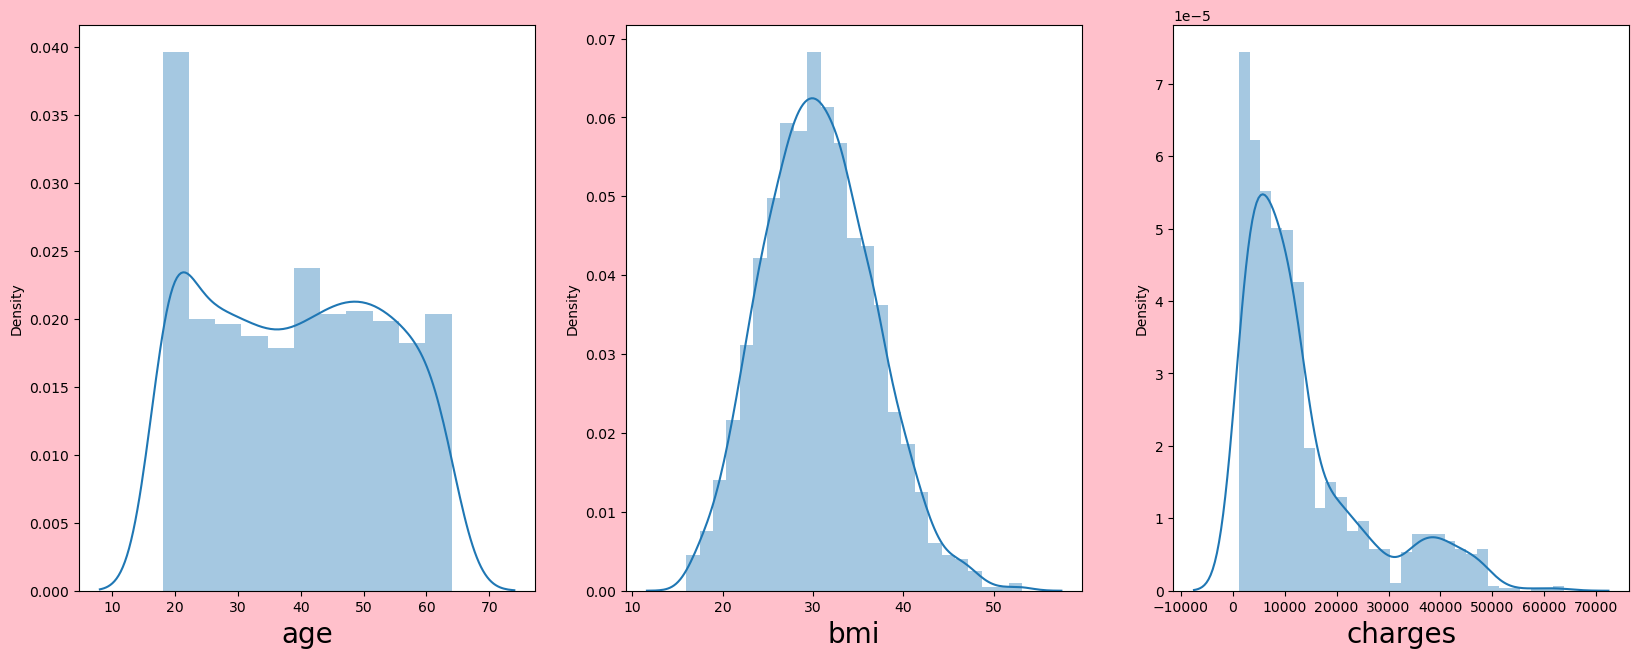

In [437]:
#to know about the distribution:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for column in numdata:
    if plotnumber<=3:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(numdata[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

With the help of above visualisation we can see the the distribution of data in the columns: age,bmi,charges.
The bmi column has symmentric contribution.The other two columns has unsymmentric distribution and skewness.


In [438]:
cat_data=df.drop(columns=["age","bmi","charges"])
cat_data

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [439]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

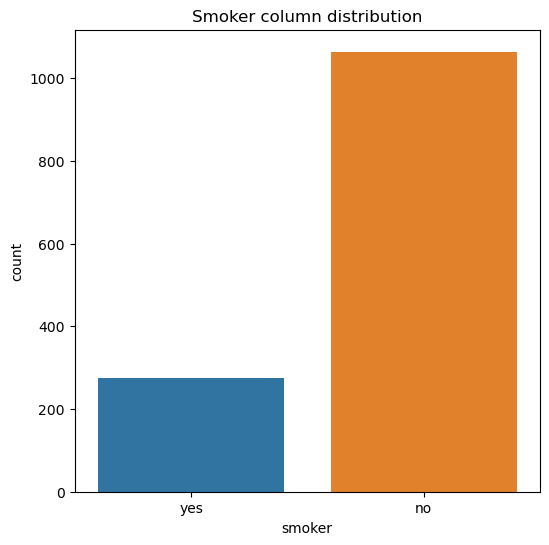

In [440]:
#to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=df)
plt.title("Smoker column distribution")
plt.show()

In [441]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There is a slight imbalance in smoker column.

<function matplotlib.pyplot.show(close=None, block=None)>

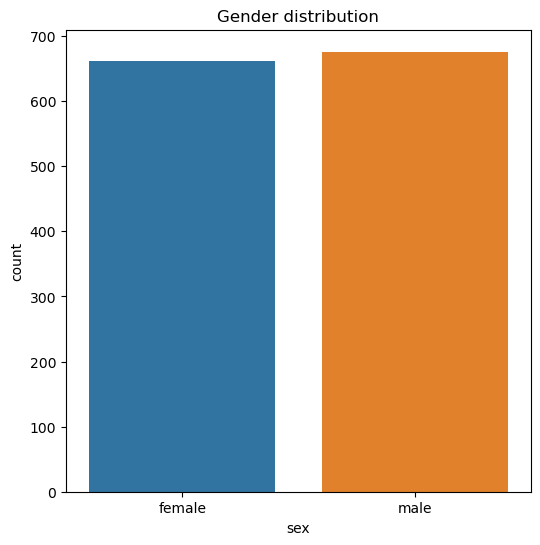

In [442]:
#To Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Gender distribution")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

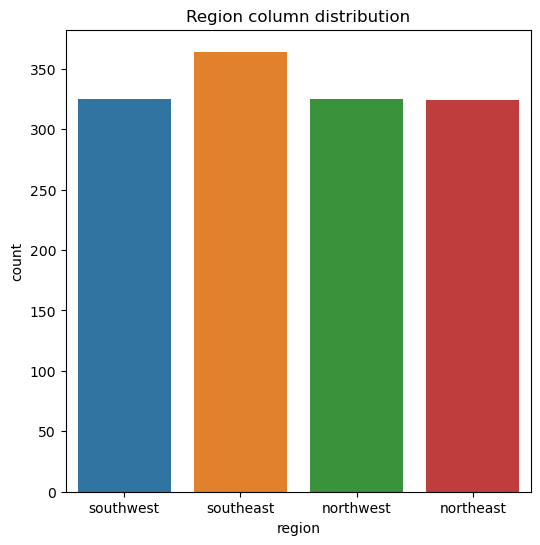

In [443]:
#To Show the counts of observations in each categorical bin using bars.
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.title("Region column distribution")
plt.show

In [444]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

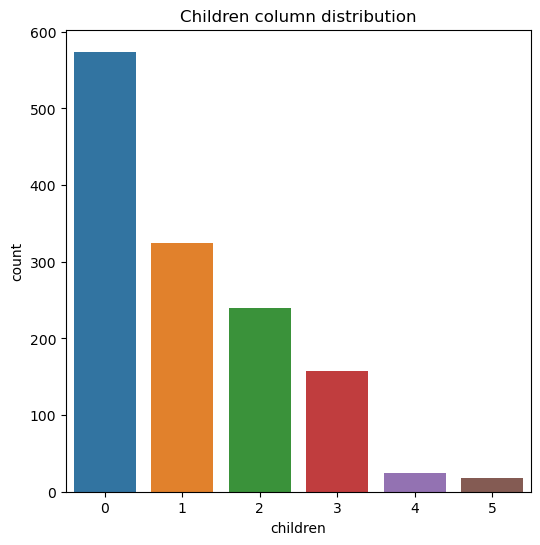

In [445]:
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("Children column distribution")
plt.show()

In [446]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From these countplots we can see there is balanced data in the column :gender,region,sex and slight imbalanced data in the column :children,smoker.


                                3)HANDLING TEXT AND CATEGORICAL ATTRIBUTES

In [447]:
from sklearn.preprocessing import OrdinalEncoder
#Transforming the text data into numerical data 


In [448]:
#region column:
ordinal_enc=OrdinalEncoder(categories=[["southwest","southeast","northeast","northwest"]])
df1=ordinal_enc.fit_transform(df[["region"]])

In [449]:
df["region"]=df1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0.0,16884.92400
1,18,male,33.770,1,no,1.0,1725.55230
2,28,male,33.000,3,no,1.0,4449.46200
3,33,male,22.705,0,no,3.0,21984.47061
4,32,male,28.880,0,no,3.0,3866.85520


The region column is encoded.

In [450]:
#Encoding sex column
df.replace({
    "sex":{"male":0,"female":1}},inplace=True)


In [451]:
#Encoding smoking column
df.replace({
    "smoker":{"yes":1,"no":0}},inplace=True)


In [452]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0.0,16884.92400
1,18,0,33.770,1,0,1.0,1725.55230
2,28,0,33.000,3,0,1.0,4449.46200
3,33,0,22.705,0,0,3.0,21984.47061
4,32,0,28.880,0,0,3.0,3866.85520


In [453]:
#to know about the correlation in the dataset
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.013246,0.787251
region,-0.003243,0.007974,-0.156686,0.001907,-0.013246,1.000000,-0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.011741,1.000000


<Axes: >

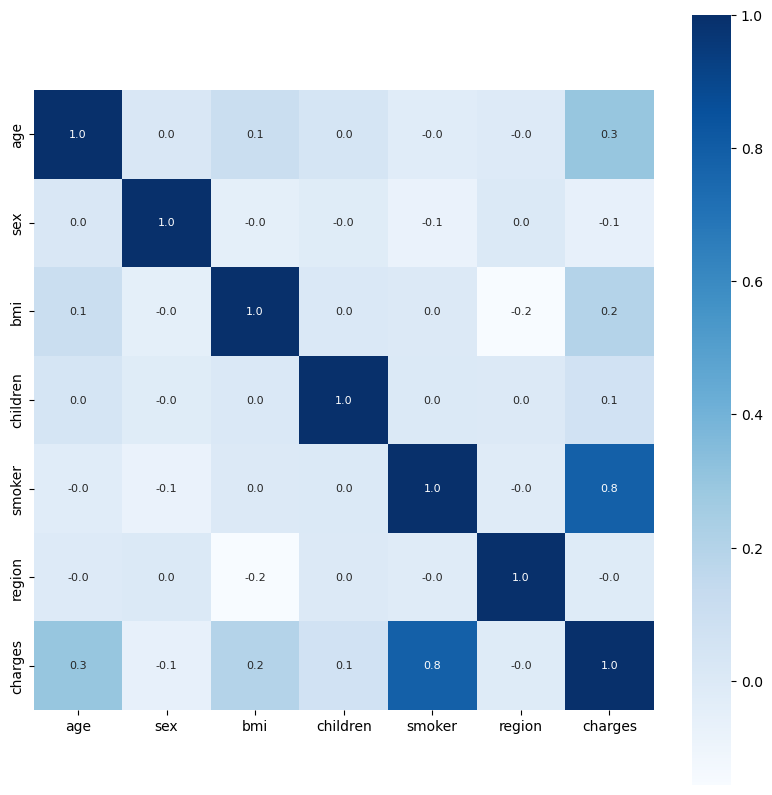

In [454]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap='Blues')


In this not much colinearity between the columns further processing the dataset for further analysis.

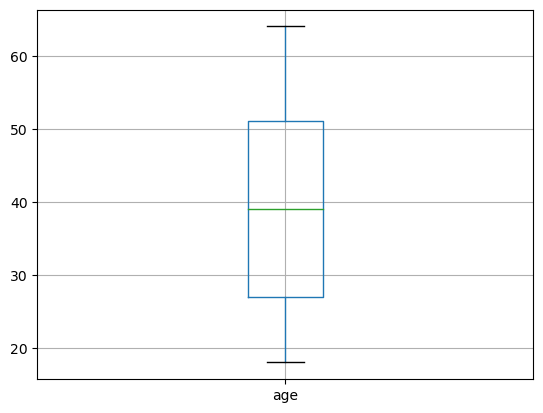

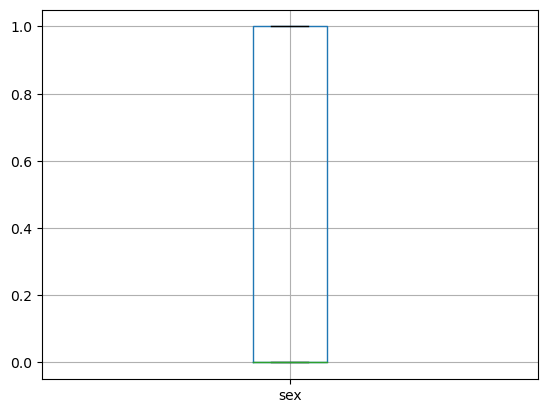

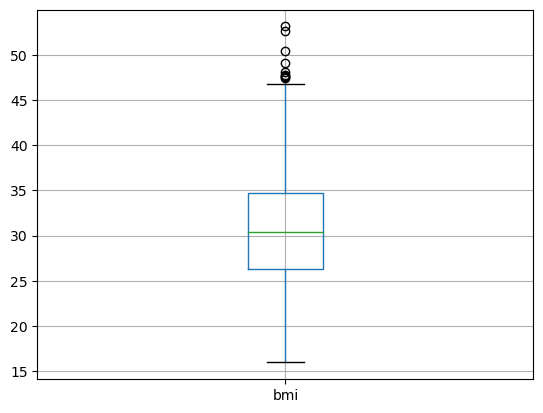

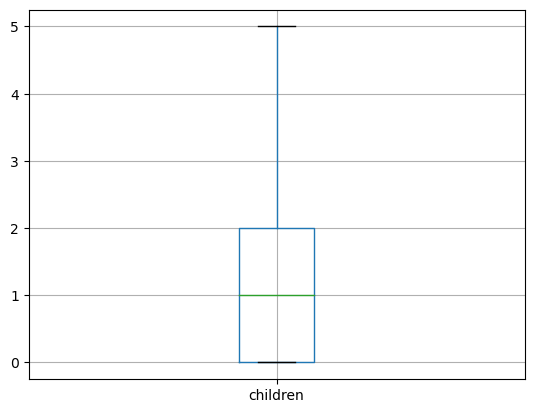

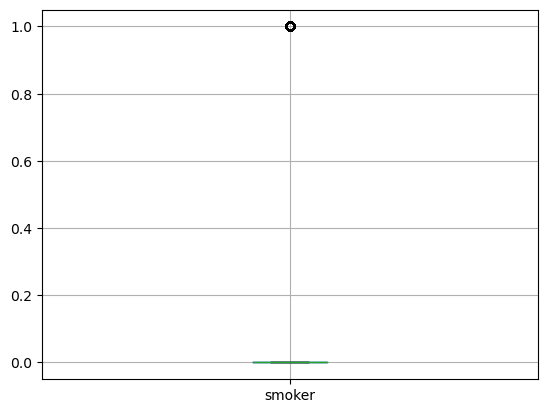

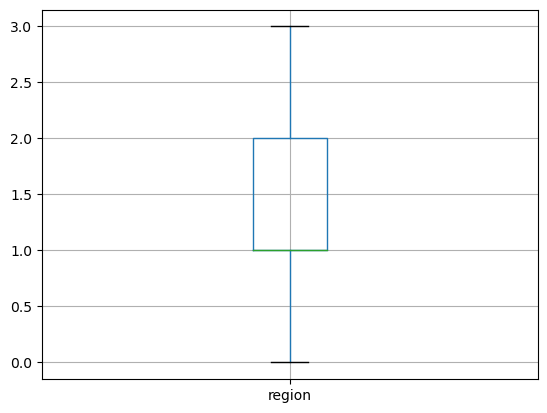

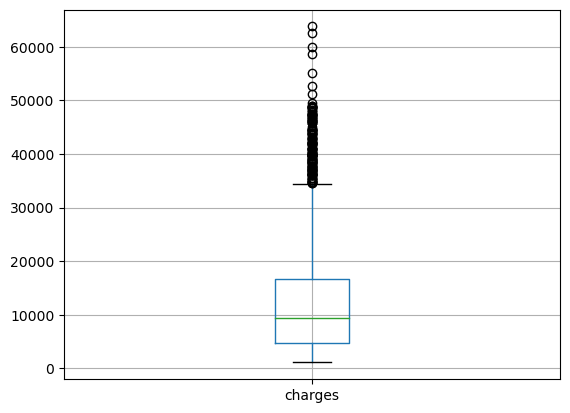

In [455]:
#to know abour the outliers using boxplot
for column in df:
    plt.figure()
    df.boxplot([column])

                   4) SPLITTING THE FEATURES AND TARGETS

In [456]:
#Importing the neccessary libraries and model for further creation of the model:

In [457]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [458]:
#spliting the dataset into feature and target variable
X=df.drop(columns="charges",axis=1)
Y=df["charges"]

spliting the data into train and test.Model will be built on training data and tested on test data.

In [459]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

                                      5)Creating the model
                                      MODEL 1 :LINEAR REGRESSION                           

In [460]:
#Model instantiating and training
LR=LinearRegression() #Widely used model and fundamental model
LR.fit(x_train,y_train)


LinearRegression()

In [461]:
#predicting for the x_test 
ytest_pred=LR.predict(x_test)

In [462]:
#it is one of the evalution metrics: it represents the average error
mean_absolute_error(y_test,ytest_pred)

4287.000383987177

In [463]:
#Evaluation metrics
mean_squared_error(y_test,prediction)

19456831.95299885

In [464]:
#Evaluation metrics: more interpretable: Root mean Squared error
np.sqrt(mean_squared_error(y_test,prediction))

4410.989906245405

In [465]:
#r2_score for testing data
r2_score(y_true=y_test,y_pred=prediction)

0.8704439122394968

In [466]:
#Training Score
train_pred=LR.predict(x_train)
r2_score(y_train,train_pred)

0.7516346664929344

The r2_Score for the linear regression model is :

For the training data:75.16%

For the testing data:74.41%

                              MODEL-2:RANDOM FOREST REGRESSOR

In [467]:
# Random forest regressoris a versatile machine-learning technique for predicting numerical values
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)


RandomForestRegressor()

In [468]:
#predicting for the x_test 
ytest_pred=RFR.predict(x_test)

In [469]:
#it is one of the evalution metrics: it represents the average error
mean_absolute_error(y_test,ytest_pred)

2802.213782204851

In [470]:
#Evaluation metrics
mean_squared_error(y_test,ytest_pred)

24905408.87257884

In [471]:
#Evaluation metrics: more interpretable: Root mean Squared error
np.sqrt(mean_squared_error(y_test,ytest_pred))

4990.531922809315

In [472]:
#r2_score for testing data
r2_score(y_test,ytest_pred)

0.834163786509462

In [473]:
#Training Score
train_pred=RFR.predict(x_train)
r2_score(y_train,train_pred)

0.976988363950562

The r2_Score for the Random Forest Regressor is :

For the training data:83.58%

For the testing data:97.78%

                                    MODEL 3: GRADIENT BOOSITNG ALGORITHM

In [474]:
#Gradient Boosting is a popular boosting algorithm in machine learning
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)


GradientBoostingRegressor()

In [475]:
#predicting for the x_test 
ytest_pred=GBR.predict(x_test)

In [476]:
#it is one of the evalution metrics: it represents the average error
mean_absolute_error(y_test,ytest_pred)

2366.692978413872

In [477]:
#Evaluation metrics
mean_squared_error(y_test,ytest_pred)

19767128.211911168

In [478]:
##Evaluation metrics: more interpretable: Root mean Squared error
np.sqrt(mean_squared_error(y_test,ytest_pred))

4446.023865423033

In [479]:
#r2_score for testing data
r2_score(y_test,ytest_pred)

0.868377760388645

In [480]:
#Training Score
train_pred=GBR.predict(x_train)
r2_score(y_train,train_pred)

0.9050631839870215

The r2_Score for the Gradient Bossting Algorithm is :

For the training data:86.81%

For the testing data:90.50%

                                  MODEL 4 :DECISION TREE REGRESSOR

In [481]:
#Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions
deci_tree=DecisionTreeRegressor()
deci_tree.fit(x_train,y_train)


DecisionTreeRegressor()

In [482]:
#predicting for the x_test 
ytest_pred=deci_tree.predict(x_test)

In [483]:
#it is one of the evalution metrics: it represents the average error
mean_absolute_error(y_test,ytest_pred)

3149.5134902201494

In [484]:
#Evaluation metrics
mean_squared_error(y_test,ytest_pred)

43889941.38518635

In [485]:
##Evaluation metrics: more interpretable: Root mean Squared error
np.sqrt(mean_squared_error(y_test,ytest_pred))

6624.948406228259

In [486]:
#r2_score for testing data
r2_score(y_test,ytest_pred)

0.7077525718658355

In [487]:
#Training Score
train_pred=deci_tree.predict(x_train)
r2_score(y_train,train_pred)

1.0

                                MODEL 5 : LASSO REGRESSION

In [488]:
#Lasso Regression is a linear regression technique that chooses the most important characteristics in addition to predicting results
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [489]:
#predicting for the x_test 
ytest_pred=lasso.predict(x_test)

In [490]:
#it is one of the evalution metrics: it represents the average error
ytest_pred=lasso.predict(x_test)

In [491]:
#it is one of the evalution metrics: it represents the average error
mean_absolute_error(y_test,ytest_pred)

4286.877445291017

In [492]:
##Evaluation metrics:
mean_squared_error(y_test,ytest_pred)

38430452.095034055

In [493]:
##Evaluation metrics: more interpretable: Root mean Squared error
np.sqrt(mean_squared_error(y_test,ytest_pred))

6199.229959844533

In [494]:
##r2_score for testing data
r2_score(y_test,ytest_pred)

0.7441053591701161

In [495]:
#Training Score
train_pred=lasso.predict(x_train)
r2_score(y_train,train_pred)

0.7516345792413232

From the above 5 models the Gradient boosting algorithm works well.We can further improve their performance with the help of parameter tuning.

In [496]:
#importing the model
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV randomly samples combinations from this parameter space and evaluates their performance using cross-validation.

In [497]:
params={'n_estimators':[47,50,60,70],'learning_rate': [0.01, 0.05, 0.1, 0.5]}
#providing the parameters

In [498]:
RSV=RandomizedSearchCV(GBR,cv=5,param_distributions=params)
#initiating the model

In [499]:
RSV.fit(x_train,y_train)
#training the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'n_estimators': [47, 50, 60, 70]})

In [500]:
RSV.best_estimator_
#finding the best estimators from the given paramter

GradientBoostingRegressor(learning_rate=0.05, n_estimators=70)

In [501]:
#creating the model providing the best estimators
gbr=GradientBoostingRegressor(learning_rate=0.05,n_estimators=70)

In [502]:
gbr.fit(x_train,y_train)#training the model

GradientBoostingRegressor(learning_rate=0.05, n_estimators=70)

In [503]:
prediction=gbr.predict(x_test)#Testing the model

In [504]:
r2_score(y_test,prediction)#Accuracy increased.

0.8704439122394968

In [505]:
#Accuracy increase earliear it was around 86.81% using the hyperparameter tuning it has been increased to 87 %

                                  6)Building the predictive System

In [506]:
data=[19,"female",27.9,0,"yes","southwest"]#raw input data
#encoding the data: female:1,male:1 smoker:no-0,yes=0
data1=[19,1,27.9,0,1,1]

In [507]:
array=np.asarray(data1)#converting to numpy array
final=array.reshape(1,-1)#reshaping as 1 column

In [508]:
predictive_sys=gbr.predict(final)#predicting with raw imput data

In [509]:
print(predictive_sys)

[18337.53839971]


In [ ]:
#end of the project
